# <u>VIDEO ENGAGEMENT SCORE PREDICTION</u>

# Objective
The main objective of the problem is to develop a machine learning model to predict the engagement score of the video at a user level.

# Training / Test Data

   - `row_id` -  Unique identifier of the row
   
   - `user_id` - Unique identifier of the user
   
   - `category_id` - Category of the video
   
   - `video_id` - Unique identifier of the video
   
   - `age` - Age of the user
   
   - `gender` - Gender of the user (Male and Female)
   
   - `profession` - Profession of the user (Student, Working Professional, Other)
   
   - `followers` - No. of users following a particular category
   
   - `views` - Total views of the videos present in the particular category
   
   - `engagement_score` - Engagement score of the video for a user (Target Variable: not in test set)

# Steps to be performed:
   1. Loading and understanding the data
   1. EDA
   2. Feature Engineering
   3. Feature Selection
   4. Base Model
   5. Model Comparison
   6. Conclusions
   7. Next Steps

## Import Libraries
Let us first import the basic libraries which we will be using for our EDA. We will keep importing other libraries as and when needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

## 1) <u>Loading and understanding the data</u>
As part of the first step let us load both of our train and test set and understand the numbers and types of features present.

In [2]:
train = pd.read_csv('train_0OECtn8.csv')
test = pd.read_csv('test_1zqHu22.csv')

In [3]:
train.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35


In [4]:
train.shape       # Number of rows and columns

(89197, 10)

In [5]:
train.dtypes      # Feature wise data types of the columns

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [6]:
train.info()      # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


As we see, the features are distributed as follows:
   - 7 numerical feature
   - 2 categorical features
   - 1 floating type target variable

### Questions answered:
   - Number of columns and rows in train and test set?
   - How many categorical and numerical features are present?
   - Are there missing values?

## 2) <u>EDA</u>
This is the most important part of any data science project! Exploratory Data Analysis is the process of drawing patterns and relations to help us in getting clarity and better understanding of our data which in turn eases the process of feature engineering and modelling.

We are going to perform the following as part of this step:
   - Check missing data
   - Understand categorical features
   - Analyse the numeric features
   - Check correlation
   - Detect outliers

In [7]:
train.isnull().sum()        # Count of missing values within each feature

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

### We have a decent dataset!! Looks like we don't have any missing values. Let us verify that visually

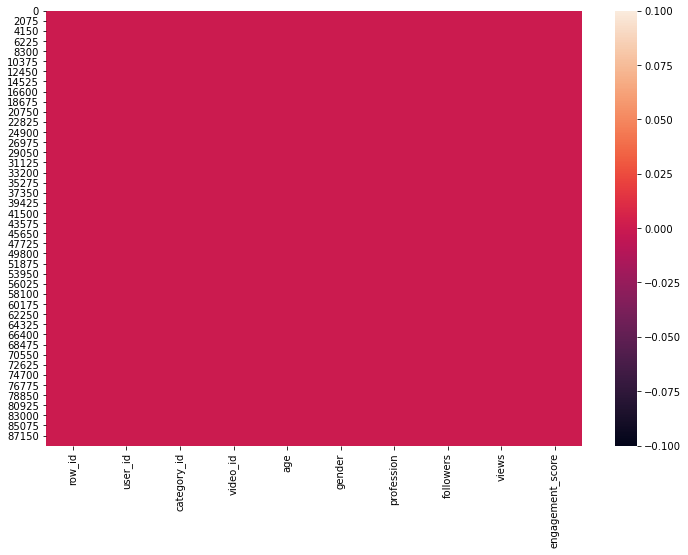

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull())              # Missing values in train set
plt.show()

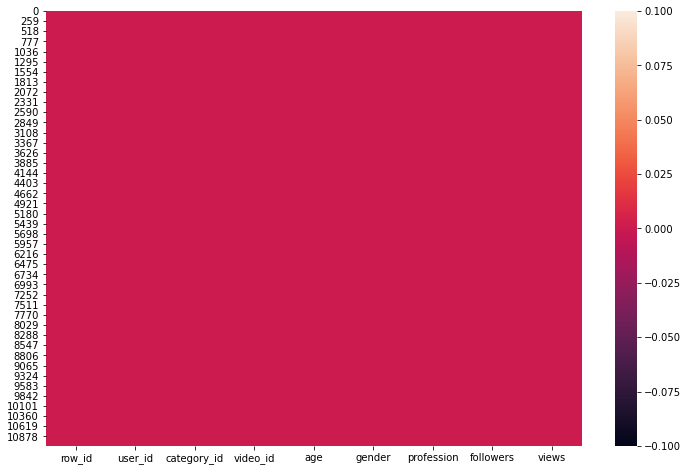

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(test.isnull())                # Missing values in test set
plt.show()

### Categorical Features 

In [10]:
cat_features = [i for i in train.columns if train[i].dtypes == 'object']     # list of categorical features
cat_features

['gender', 'profession']

In [11]:
# !pip install simple-colors

In [12]:
from simple_colors import *        # Output formatting

def val_count(df, features):
    for i in features:
        print(red(i.upper(), ['bold', 'underlined']))
        print(df[i].value_counts(),'\n')

In [13]:
val_count(train, cat_features)

GENDER
Male      52397
Female    36800
Name: gender, dtype: int64 

PROFESSION
Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64 



In [14]:
val_count(test, cat_features)

GENDER
Male      6377
Female    4744
Name: gender, dtype: int64 

PROFESSION
Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64 



<code style="background:grey;color:black">We see that number of males are greater both in test and train set. Also, students are dominating in both the sets. We also have few working professions and folks from other professionals as well. Let us verify our conclusions via pie-chart</code>

In [15]:
def pie(df, col_list1, col_list2):
    def label_function(val):          # To print values on each category                              
        return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

    df.groupby('profession').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12}, colors=col_list1, ax=ax1)
    df.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12}, colors=col_list2, ax=ax2)

    ax1.set_ylabel('Profession', size=20)
    ax2.set_ylabel('Gender', size=20)

    plt.tight_layout()
    plt.show()

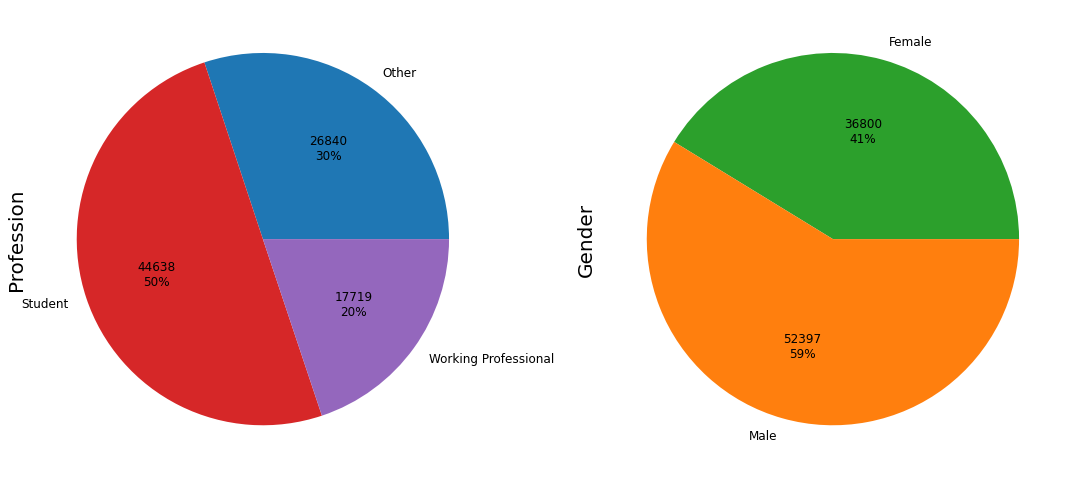

In [16]:
pie(train, ['C0', 'C3', 'C4'], ['C2', 'C1'])

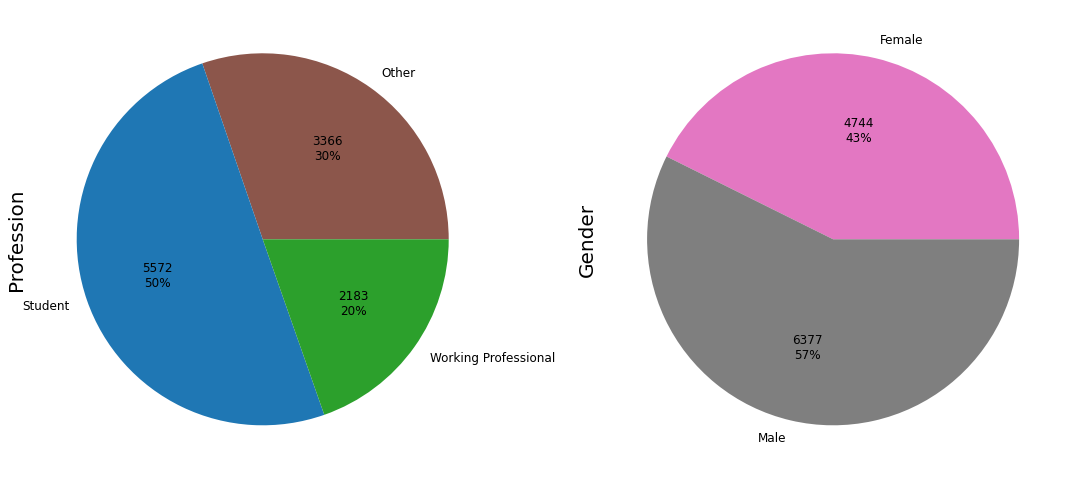

In [17]:
pie(test, ['C5', 'C0', 'C2'], ['C6', 'C7'])

<code style="background:grey;color:black">The above distribution of groups within the categorical features shows that the trend / pattern is same in training and test dataset</code>

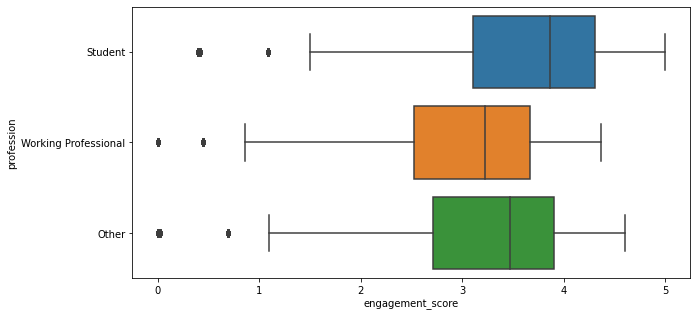

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot( x=train["engagement_score"], y=train["profession"] )         # Anomalies
plt.show()

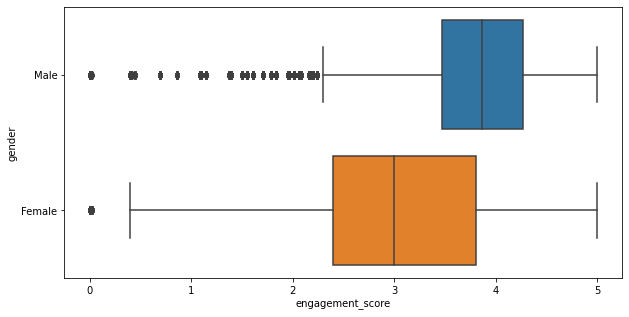

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot( x=train["engagement_score"], y=train["gender"] )
plt.show()

<code style="background:grey;color:black">We see there are some outliers in profession feature for every group. The boxplot also gives us statistical information about the data. For example for the male gender the range of engagement score is from 2.2 to 5 and the mean is at 3.9</code>

### Numerical Features

We will analyse the below numerical features now.

- user_id
- category_id
- video_id
- age
- followers
- views

In [21]:
num_feature_all = [i for i in train.columns if train[i].dtypes == 'int64']
num_feature_id = num_feature_all[1:4]            # id columns
num_feature = num_feature_all[4:]               # non-id columns

#### Let us first see the non id columns

In [22]:
# Let us check some statistical values (like the range, mean, percentiles)
train[num_feature].describe()

,age,followers,views
count,89197.000000,89197.000000,89197.000000
mean,24.848616,252.460172,502.980268
std,8.955535,46.094468,268.569482
min,10.000000,160.000000,30.000000
25%,18.000000,230.000000,229.000000
50%,23.000000,240.000000,467.000000
75%,32.000000,280.000000,714.000000
max,68.000000,360.000000,1000.000000


In [23]:
val_count(train, num_feature)                     # Values counts of each group within different feature

AGE
18    4870
19    4528
20    4399
17    4356
16    4014
15    3875
21    3722
22    3576
14    3086
23    2971
24    2915
31    2796
30    2781
33    2756
28    2687
32    2687
29    2602
13    2588
34    2541
26    2507
25    2463
35    2422
27    2301
36    2003
37    1816
12    1776
38    1480
39    1238
11    1171
40    1066
41     834
10     752
42     675
43     592
44     449
46     343
45     340
47     264
48     197
50     172
49     131
51      97
53      81
52      66
54      51
55      48
57      40
56      24
58       8
63       8
68       6
66       5
64       5
59       4
67       3
60       3
61       3
62       3
Name: age, dtype: int64 

FOLLOWERS
230    16477
240    14767
280     7559
180     7092
270     6965
250     5533
320     5146
340     4941
210     4038
260     3340
220     2838
330     2712
290     2178
160     1885
360     1810
200     1680
190      236
Name: followers, dtype: int64 

VIEWS
628     9090
229     8104
317     4880
369     4679
909     404

In [24]:
def num_plot(df, col):
    '''
    Takes dataframe and color to illustrate countplot
    '''
    for i in num_feature:
        plt.figure(figsize=(10,7))
        sns.countplot(df[i], color=col)
        plt.title(i.upper())
        plt.show()

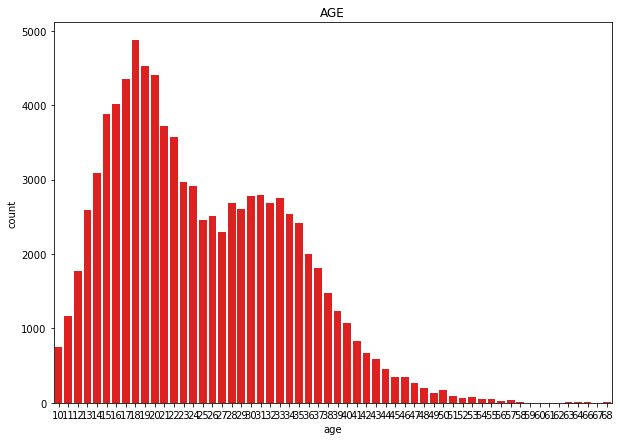

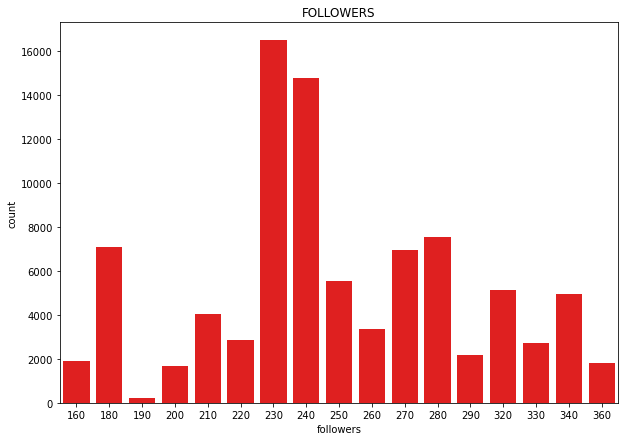

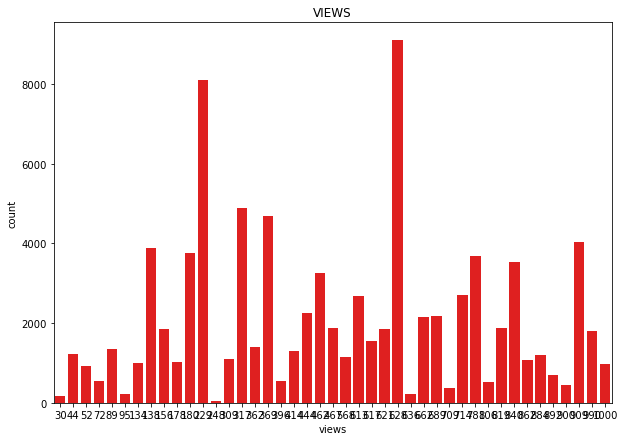

In [25]:
num_plot(train, 'red')

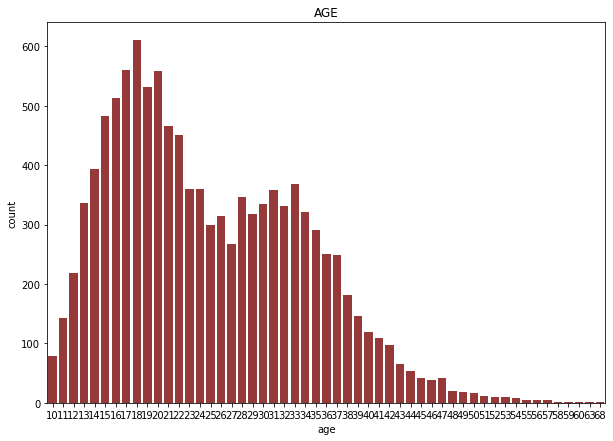

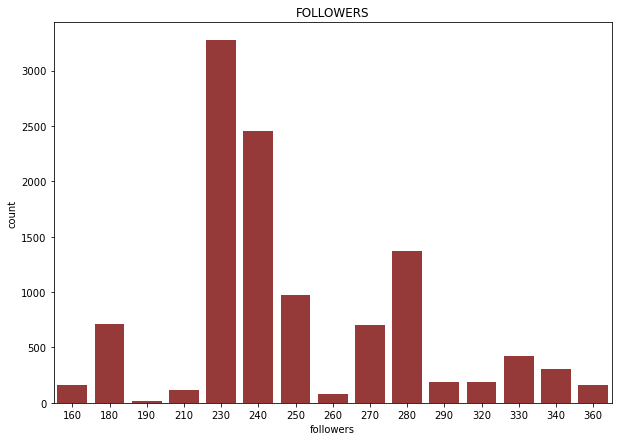

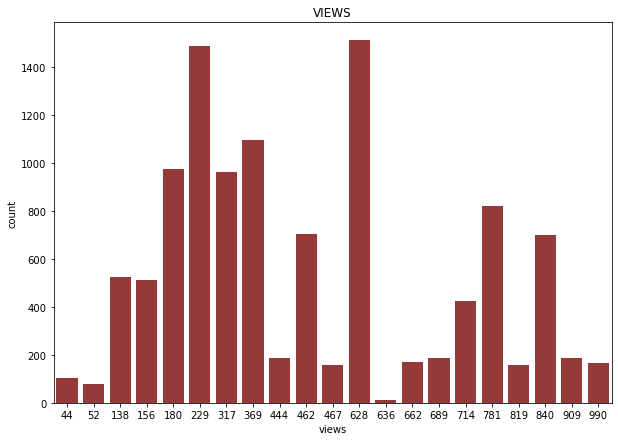

In [26]:
num_plot(test, 'brown')

### Detect outliers

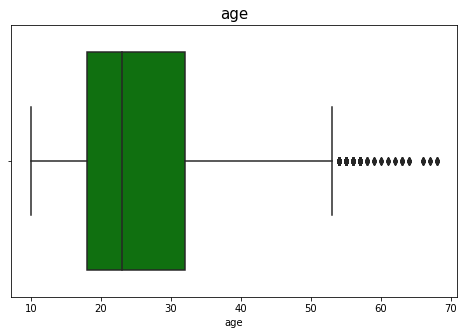

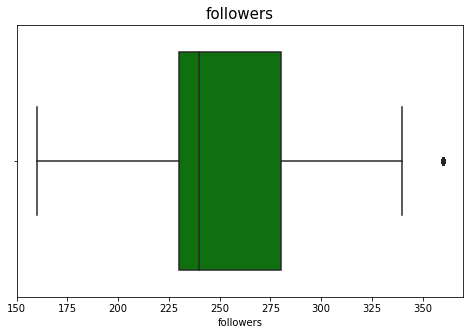

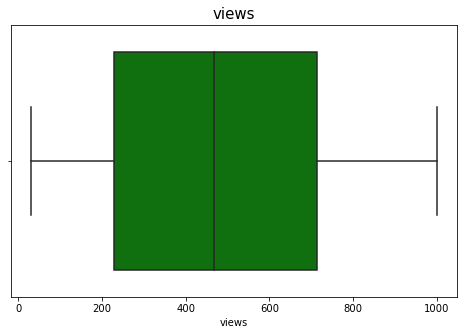

In [27]:
for i in num_feature:           # Boxplot of non-id numerical columns
    plt.figure(figsize=(8,5))
    sns.boxplot(train[i], color='g')
    plt.title(i, fontsize=15)
    plt.show()

<code style="background:grey;color:black">We see a couple of outliers in age feature and a single in followers. The views feature is well distributed within the range of 0 to 1000 with a mean of around 475. We will handle the outliers for age feature later in our feature engineering section.</code>

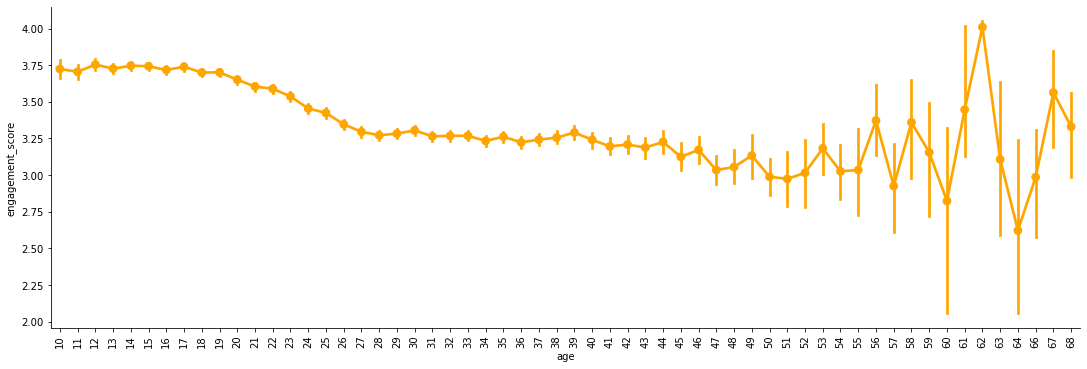

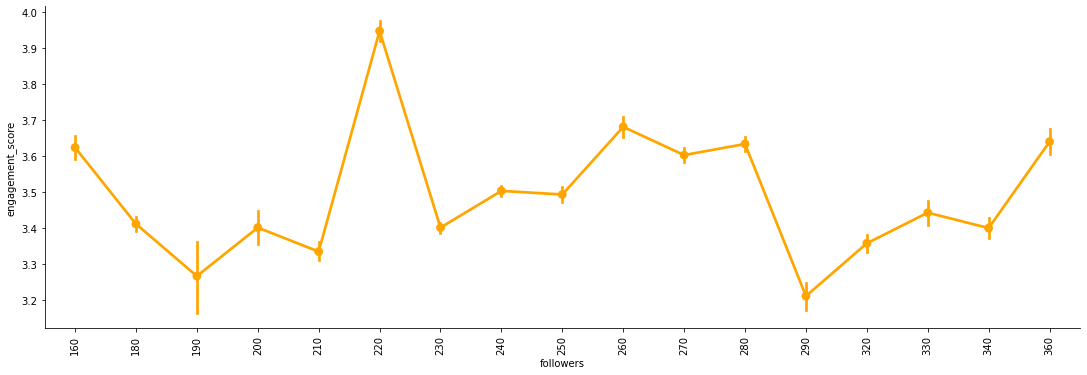

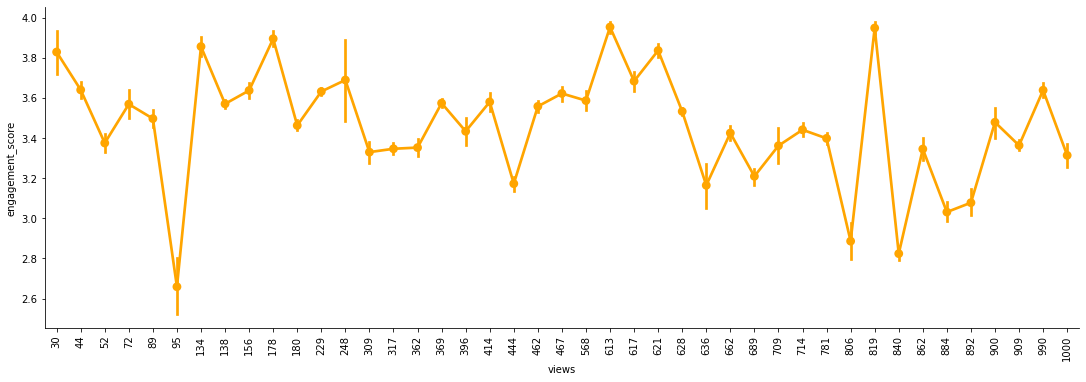

In [28]:
for i in num_feature:           # to see the variation of the score with varying values within each feature
    sns.catplot(x=i, y='engagement_score', data=train, kind='point', aspect=3, color='orange')
    plt.xticks(rotation=90)
    plt.show()

The above bivariate analysis shows how the engagement score varies with increaing feature values. Key points to note:
   - Engagement score is consistently high for viewers less than 40 yrs, beyond which the score is quite unstable
   - Videos with 220 followers seem to perform exceptionally well whereas those with 190 and 290 have done poorly
   - Videos with view count 95, 806 and 840 are least engaging. All others have score above 3

### ID features

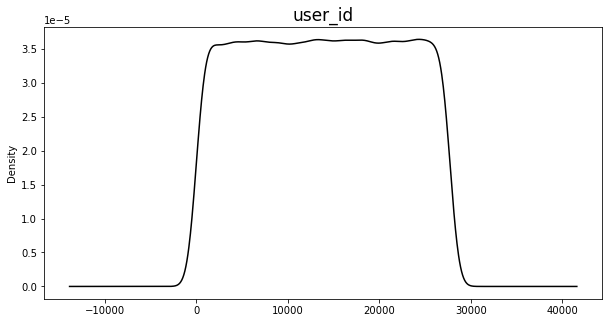

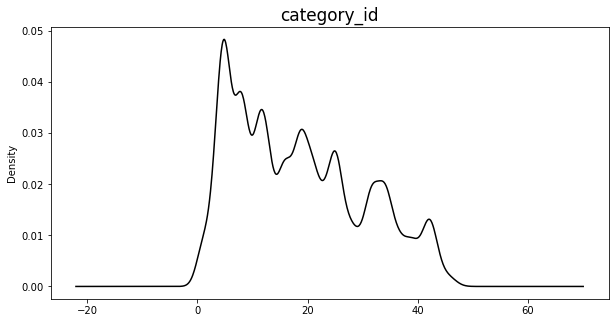

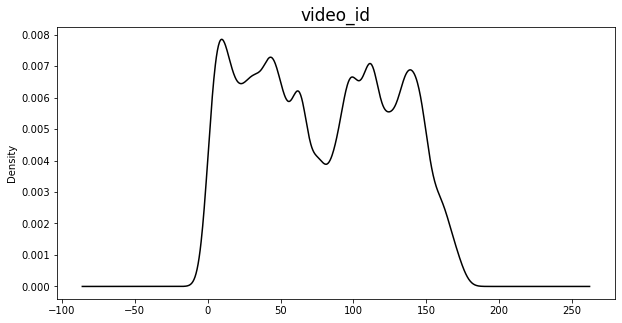

In [29]:
for i in num_feature_id:          # to visualize spread of id columns
    plt.figure(figsize=(10,5))
    train[i].plot(kind='density', color='black')
    plt.title(i, fontsize=17)
    plt.show()

### Features vs Target Relation

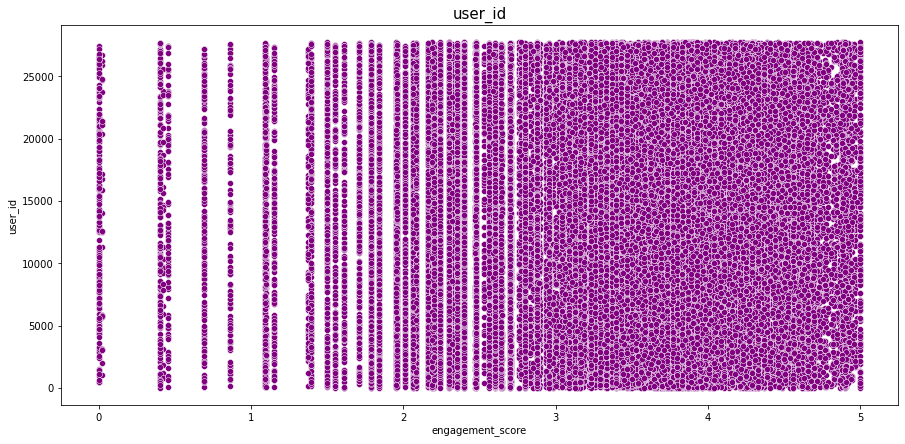

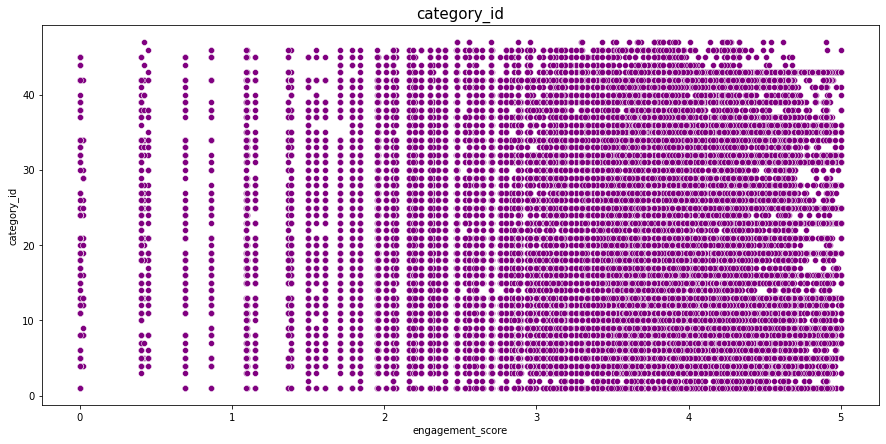

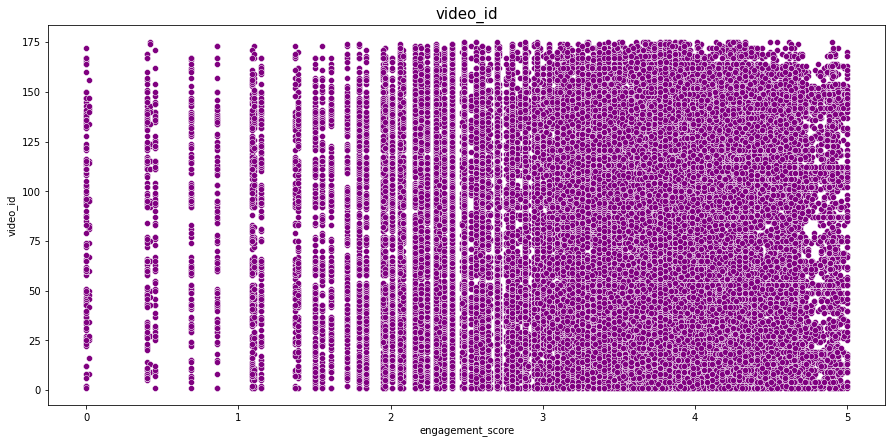

In [30]:
for i in num_feature_id:              # to visualize spread of id columns with respect to target variable
    
    plt.figure(figsize=(15,7))
    sns.scatterplot(y=train[i], x=train['engagement_score'], color='purple')
    plt.title(i, fontsize=15)
    plt.show()

<code style="background:grey;color:black">Conclusion from the above relation: Greater the ids' value more is the engagement. All the features follow the same trend</code>

### Correlation values

In [43]:
train.corr(method='spearman')               

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006959,0.002198,0.000631,-0.005276,-0.000156,-0.001807,-0.003993
user_id,-0.006959,1.000000,0.001358,0.005111,0.000193,-0.003117,-0.001499,-0.003491
category_id,0.002198,0.001358,1.000000,0.551871,-0.005546,0.050237,0.057877,-0.082837
video_id,0.000631,0.005111,0.551871,1.000000,-0.003975,0.133103,-0.027851,-0.022974
age,-0.005276,0.000193,-0.005546,-0.003975,1.000000,0.005214,0.010015,-0.270744
followers,-0.000156,-0.003117,0.050237,0.133103,0.005214,1.000000,0.274593,0.010973
views,-0.001807,-0.001499,0.057877,-0.027851,0.010015,0.274593,1.000000,-0.084775
engagement_score,-0.003993,-0.003491,-0.082837,-0.022974,-0.270744,0.010973,-0.084775,1.000000


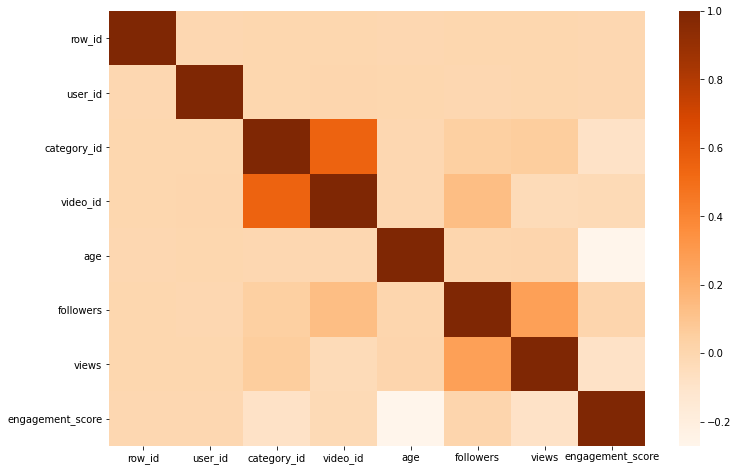

In [44]:
plt.figure(figsize=(12,8))                        # To visualize the correlation among different features
sns.heatmap(train.corr(method='spearman'), cmap='Oranges')
plt.show()

<code style="background:grey;color:black">The correlation map and correlation table above say that video_id and category_id are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables</code>

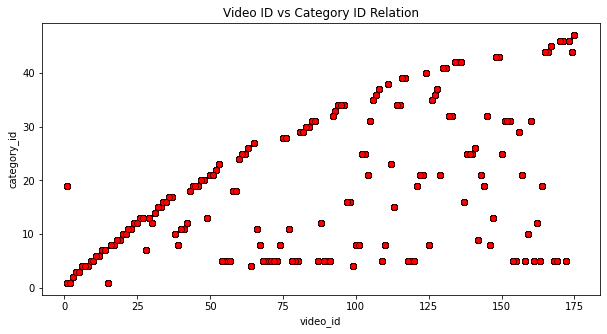

In [45]:
plt.figure(figsize=(10,5))                         # to verify the above conclusion 
plt.scatter(x=train['video_id'], y=train['category_id'], color='red', edgecolors="#000000", linewidths=0.5)
plt.xlabel("video_id")
plt.ylabel("category_id")
plt.title('Video ID vs Category ID Relation')
plt.show()

<code style="background:grey;color:black">We see that category_id and video_id are truly positively correlated: as one increases, the other increases too—mostly.</code>

<Figure size 1008x720 with 0 Axes>

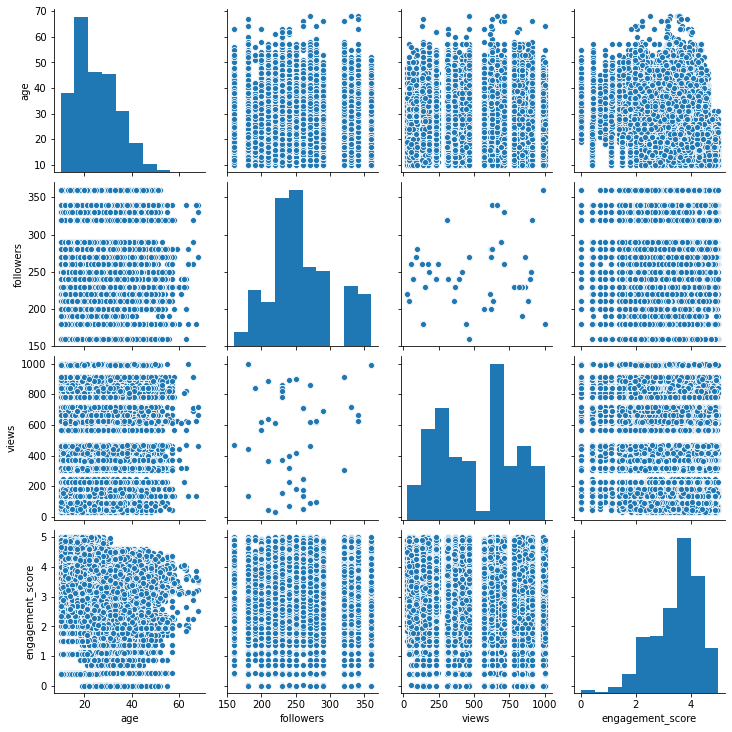

In [46]:
plt.figure(figsize=(14,10))                     # Summary of variation of one feature with respect to another
sns.pairplot(train, vars = ['age', 'followers', 'views', 'engagement_score'], palette='Dark2')
plt.show()

In [47]:
train.video_id.describe()

count    89197.000000
mean        77.715383
std         48.469656
min          1.000000
25%         34.000000
50%         76.000000
75%        120.000000
max        175.000000
Name: video_id, dtype: float64

### Which video_id is most trending and which one is the least?

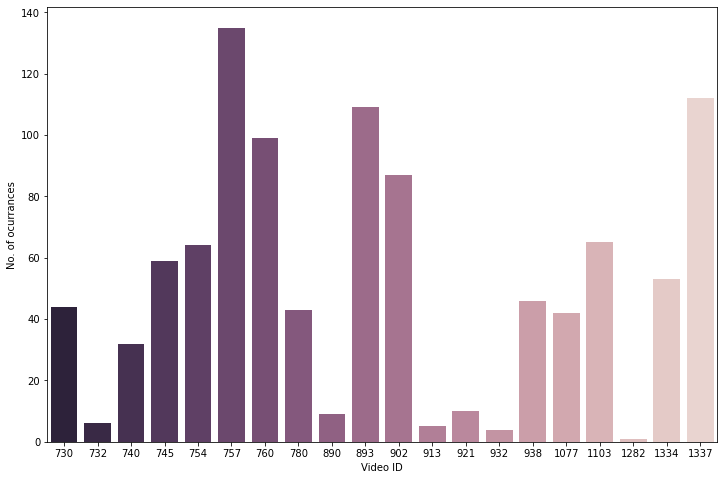

In [36]:
cdf = train.groupby("video_id").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

plt.subplots(figsize=(12,8))
sns.barplot(x="video_count", y="video_id", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.xlabel("Video ID") 
plt.ylabel("No. of ocurrances")
plt.show()

Conclusions drawn from the EDA:
   - 

   - No missing values in either of the datasets
   - The pattern or trend in categorical distributions within each feature is similar in train and test set
   - video_is and category_id are highly correlated
   - We have detected outliers in 2 out of the 3 non-id numerical columns. It is imperative to handle the outliers in age column as there is a lot of unstability in scores for folks beyond 55 years as seen in the catplot.

## 3) <u>Feature Engineering</u>
After getting a fair understanding of our data from the previous section, we will now be performing certain operations on the data to clean it and make it model-ready. We will be operating upon both the train and test data simultaneously
   - Imputation
   - Handling Outliers
   - Binning
   - Feature Extraction
   - Encoding
   - Normalization

### 1. Imputaion: 
Treating missing values is of utmost importance. Modelling doesn't work with black values in the data. There are multiple ways of imputation. Since we do not have any missing data in our data set as seen previously, we can safely proceed.

### 2. Handle Outliers

In [37]:
train.age[train['age']>57].value_counts()

58    8
63    8
68    6
64    5
66    5
59    4
67    3
60    3
61    3
62    3
Name: age, dtype: int64

In [38]:
test.age[test['age']>57].value_counts()

63    2
58    1
68    1
60    1
59    1
Name: age, dtype: int64

<code style="background:grey;color:black">We see there are very few entries having age greater than 57 in both the data sets. Therefore, we will replace these values with the median</code>

In [39]:
# Handle outliers
tr_median = train.loc[train['age']<57, 'age'].median()
train["age"] = np.where(train["age"] >57, tr_median, train['age'])

te_median = train.loc[train['age']<57, 'age'].median()
test["age"] = np.where(test["age"] >57, te_median, test['age'])

### 3. Binning
Grouping the numerical features as:

1. Age:
   - 10-17: Juniors
   - 18-26: Young Adults
   - 27-40: Adults
   - 41-58: Seniors
   
3. Views:
   - 30-200: Flop
   - 201-400: Average
   - 401-600: Hit
   - 601-800: Popular
   - 801-1000: Viral

In [40]:
age_bins = [8,18,27,41,58]
view_bins = [25, 200, 400, 600, 800, 1050]

def binning(df): 
    df['agegroup'] = pd.cut(df['age'], bins=age_bins, labels=['Junior','Young Adult','Adult','Senior'])
    df['viewsgroup'] = pd.cut(df['views'], bins=view_bins, labels=['Flop', 'Avg', 'Hit', 'Popular', 'Viral'])

In [41]:
binning(train)
binning(test)

In [42]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,agegroup,viewsgroup
0,1,19990,37,128,24.0,Male,Student,180,1000,4.33,Young Adult,Viral
1,2,5304,32,132,14.0,Female,Student,330,714,1.79,Junior,Popular
2,3,1840,12,24,19.0,Male,Student,180,138,4.35,Young Adult,Flop
3,4,12597,23,112,19.0,Male,Student,220,613,3.77,Young Adult,Popular
4,5,13626,23,112,27.0,Male,Working Professional,220,613,3.13,Young Adult,Popular


### 4. Extracting new_views feature

<code style="background:grey;color:black">Assuming that a video is viewed by its followers, we create a new column by subtracting the followers from views for the video</code>

In [43]:
train['new_views'] = train['views'] - train['followers']
test['new_views'] = test['views'] - test['followers']

In [44]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,agegroup,viewsgroup,new_views
0,1,19990,37,128,24.0,Male,Student,180,1000,4.33,Young Adult,Viral,820
1,2,5304,32,132,14.0,Female,Student,330,714,1.79,Junior,Popular,384
2,3,1840,12,24,19.0,Male,Student,180,138,4.35,Young Adult,Flop,-42
3,4,12597,23,112,19.0,Male,Student,220,613,3.77,Young Adult,Popular,393
4,5,13626,23,112,27.0,Male,Working Professional,220,613,3.13,Young Adult,Popular,393


In [45]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,agegroup,viewsgroup,new_views
0,89198,7986,12,42,14.0,Male,Student,180,138,Junior,Flop,-42
1,89199,11278,34,115,14.0,Male,Student,230,840,Junior,Viral,610
2,89200,17245,8,110,44.0,Female,Working Professional,280,628,Senior,Popular,348
3,89201,9851,16,137,18.0,Male,Student,270,462,Junior,Hit,192
4,89202,16008,34,96,47.0,Female,Other,230,840,Senior,Viral,610


<code style="background:grey;color:black">We find that there are quite a number of negative values indicating that those videos performed poorly as it did not receive even as many views as its followers count. Also, most of the videos with positive numbers did quite well as it received 100+ new views. Therefore, let us categorize the new_views into 2 groups, namely, positive and negative.</code>

In [46]:
train['new_views_bool'] = train['new_views'].apply(lambda x: 'Positive' if x>0 else 'Negative')
test['new_views_bool'] = test['new_views'].apply(lambda x: 'Positive' if x>0 else 'Negative')

In [47]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,agegroup,viewsgroup,new_views,new_views_bool
0,1,19990,37,128,24.0,Male,Student,180,1000,4.33,Young Adult,Viral,820,Positive
1,2,5304,32,132,14.0,Female,Student,330,714,1.79,Junior,Popular,384,Positive
2,3,1840,12,24,19.0,Male,Student,180,138,4.35,Young Adult,Flop,-42,Negative
3,4,12597,23,112,19.0,Male,Student,220,613,3.77,Young Adult,Popular,393,Positive
4,5,13626,23,112,27.0,Male,Working Professional,220,613,3.13,Young Adult,Popular,393,Positive


In [48]:
# Dropping the original columns as we have extracted the required information

train.drop(['age', 'views', 'new_views'], axis=1, inplace=True)
test.drop(['age', 'views', 'new_views'], axis=1, inplace=True)

In [49]:
train.head()

,row_id,user_id,category_id,video_id,gender,profession,followers,engagement_score,agegroup,viewsgroup,new_views_bool
0,1,19990,37,128,Male,Student,180,4.33,Young Adult,Viral,Positive
1,2,5304,32,132,Female,Student,330,1.79,Junior,Popular,Positive
2,3,1840,12,24,Male,Student,180,4.35,Young Adult,Flop,Negative
3,4,12597,23,112,Male,Student,220,3.77,Young Adult,Popular,Positive
4,5,13626,23,112,Male,Working Professional,220,3.13,Young Adult,Popular,Positive


In [50]:
train.dtypes

row_id                 int64
user_id                int64
category_id            int64
video_id               int64
gender                object
profession            object
followers              int64
engagement_score     float64
agegroup            category
viewsgroup          category
new_views_bool        object
dtype: object

In [51]:
# Converting the data types of categorical features before proceeding with encoding
train['agegroup'] = train['agegroup'].astype('object')
test['agegroup'] = test['agegroup'].astype('object')

train['viewsgroup'] = train['viewsgroup'].astype('object')
test['viewsgroup'] = test['viewsgroup'].astype('object')

In [52]:
train.head()

,row_id,user_id,category_id,video_id,gender,profession,followers,engagement_score,agegroup,viewsgroup,new_views_bool
0,1,19990,37,128,Male,Student,180,4.33,Young Adult,Viral,Positive
1,2,5304,32,132,Female,Student,330,1.79,Junior,Popular,Positive
2,3,1840,12,24,Male,Student,180,4.35,Young Adult,Flop,Negative
3,4,12597,23,112,Male,Student,220,3.77,Young Adult,Popular,Positive
4,5,13626,23,112,Male,Working Professional,220,3.13,Young Adult,Popular,Positive


### 5. Encoding

Encoding is another key step in the machine learning workflow. As the algorithms understand only numbers hence, it is necessary for us to convert all categorical features into numerical ones before we can feed the data into our model. There are different ways of achieving this. Here we are going to use 2 of these:
   1. One-hot encoding for features with more than 3 categories: `agegroup` and `viewsgroup`
   
   2. Label encoding for the rest of the categorical features: `gender`, `prefession`, `new_views_bool`
   
   3. Frequency encoding on `row_id`
   
One-hot encoding is recommended for features with numerous categories. Therefoe, we will refrain from using it on features with 2 or 3 groups.

In [53]:
# One-hot encoding on train
age = pd.get_dummies(train['agegroup'], drop_first = True)          # Dummy variable for ‘agegroup’ column
views = pd.get_dummies(train['viewsgroup'], drop_first = True)      # Dummy variable for ‘viewsgroup’ column

train = train.drop(['agegroup','viewsgroup'], axis = 1)             # Dropping the original ‘agegroup’ and ‘viewsgroup’ columns

train = pd.concat([train,age,views], axis = 1)                      #Adding the dummy columns to the dataset
train.head()

,row_id,user_id,category_id,video_id,gender,profession,followers,engagement_score,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral
0,1,19990,37,128,Male,Student,180,4.33,Positive,0,0,1,0,0,0,1
1,2,5304,32,132,Female,Student,330,1.79,Positive,1,0,0,0,0,1,0
2,3,1840,12,24,Male,Student,180,4.35,Negative,0,0,1,1,0,0,0
3,4,12597,23,112,Male,Student,220,3.77,Positive,0,0,1,0,0,1,0
4,5,13626,23,112,Male,Working Professional,220,3.13,Positive,0,0,1,0,0,1,0


In [54]:
# One-hot encoding on test
age = pd.get_dummies(test['agegroup'], drop_first = True)          # Dummy variable for ‘agegroup’ column
views = pd.get_dummies(test['viewsgroup'], drop_first = True)      # Dummy variable for ‘viewsgroup’ column

test = test.drop(['agegroup','viewsgroup'], axis = 1)             # Dropping the original ‘agegroup’ and ‘viewsgroup’ columns

test = pd.concat([test,age,views], axis = 1)                      #Adding the dummy columns to the dataset
test.head()

,row_id,user_id,category_id,video_id,gender,profession,followers,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral
0,89198,7986,12,42,Male,Student,180,Negative,1,0,0,1,0,0,0
1,89199,11278,34,115,Male,Student,230,Positive,1,0,0,0,0,0,1
2,89200,17245,8,110,Female,Working Professional,280,Positive,0,1,0,0,0,1,0
3,89201,9851,16,137,Male,Student,270,Positive,1,0,0,0,1,0,0
4,89202,16008,34,96,Female,Other,230,Positive,0,1,0,0,0,0,1


In [55]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

def LE(train, test):
    le = LabelEncoder()
    for col in train.columns:
        if (train[col].dtypes == 'object'):
            train[col] = le.fit_transform(train[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
            test[col] = test[col].apply(lambda x: le_dict.get(x, -1))
    return train, test

train_df, test_df = LE(train, test)

In [56]:
train.head()

,row_id,user_id,category_id,video_id,gender,profession,followers,engagement_score,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral
0,1,19990,37,128,1,1,180,4.33,1,0,0,1,0,0,0,1
1,2,5304,32,132,0,1,330,1.79,1,1,0,0,0,0,1,0
2,3,1840,12,24,1,1,180,4.35,0,0,0,1,1,0,0,0
3,4,12597,23,112,1,1,220,3.77,1,0,0,1,0,0,1,0
4,5,13626,23,112,1,2,220,3.13,1,0,0,1,0,0,1,0


In [57]:
# Frequency encoding

fe_train = (train.groupby('user_id').size())            # Replacing the user_id with the count of each id in the list
train['user_id'+'_en'] = train['user_id'].map(fe_train).round(4)

In [58]:
fe_test = (test.groupby('user_id').size())
test['user_id'+'_en'] = test['user_id'].map(fe_train).round(4)

In [59]:
train.drop('user_id', axis=1, inplace=True)           # Dropping the original user_id feature
test.drop('user_id', axis=1, inplace=True)

In [60]:
train.head()

,row_id,category_id,video_id,gender,profession,followers,engagement_score,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral,user_id_en
0,1,37,128,1,1,180,4.33,1,0,0,1,0,0,0,1,3
1,2,32,132,0,1,330,1.79,1,1,0,0,0,0,1,0,5
2,3,12,24,1,1,180,4.35,0,0,0,1,1,0,0,0,3
3,4,23,112,1,1,220,3.77,1,0,0,1,0,0,1,0,3
4,5,23,112,1,2,220,3.13,1,0,0,1,0,0,1,0,4


In [61]:
# Dropping the row_id as that is is just a unique identifier and does not help in determining the target. 
train.drop('row_id', axis=1, inplace=True)
row_id = test['row_id']                      # for submission file
test.drop('row_id', axis=1, inplace=True)

## Feature Scaling

This is another crucial step. When we have a lot of features of different units it is normal that the values would be in drastically different ranges. Algorithms like KNN which work on distance calculation will perform poorly. So it is a good practice to scale down and bring them in the same range. 

Since, we have less number of features and the values are almost in the same range, scaling will not have any effect. Moreover, we will be using ensemble modelling techniques which are immune to scaling.

Let us see how the scaling changes our dataset.

#### Before Scaling

In [62]:
train.head()

,category_id,video_id,gender,profession,followers,engagement_score,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral,user_id_en
0,37,128,1,1,180,4.33,1,0,0,1,0,0,0,1,3
1,32,132,0,1,330,1.79,1,1,0,0,0,0,1,0,5
2,12,24,1,1,180,4.35,0,0,0,1,1,0,0,0,3
3,23,112,1,1,220,3.77,1,0,0,1,0,0,1,0,3
4,23,112,1,2,220,3.13,1,0,0,1,0,0,1,0,4


In [63]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_features = [i for i in train.columns]
num_features.remove('engagement_score')
num_features

train[num_features] = scaler.fit_transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

#### After Scaling

In [64]:
train.head()

,category_id,video_id,gender,profession,followers,engagement_score,new_views_bool,Junior,Senior,Young Adult,Flop,Hit,Popular,Viral,user_id_en
0,1.599668,1.037451,0.838051,0.146215,-1.572002,4.33,0.627267,-0.649920,-0.204187,1.425068,-0.466323,-0.352433,-0.649448,2.122651,-0.473628
1,1.171406,1.119977,-1.193244,0.146215,1.682203,1.79,0.627267,1.538652,-0.204187,-0.701721,-0.466323,-0.352433,1.539768,-0.471109,1.063436
2,-0.541643,-1.108233,0.838051,0.146215,-1.572002,4.35,-1.594218,-0.649920,-0.204187,1.425068,2.144436,-0.352433,-0.649448,-0.471109,-0.473628
3,0.400534,0.707346,0.838051,0.146215,-0.704214,3.77,0.627267,-0.649920,-0.204187,1.425068,-0.466323,-0.352433,1.539768,-0.471109,-0.473628
4,0.400534,0.707346,0.838051,1.576100,-0.704214,3.13,0.627267,-0.649920,-0.204187,1.425068,-0.466323,-0.352433,1.539768,-0.471109,0.294904


### Check Target Column

<code style="background:grey;color:black">The target colum is already normally distributed. No need to perform any normalization on it.</code>

<AxesSubplot:>

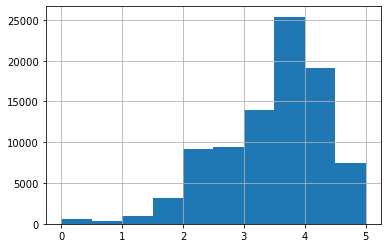

In [65]:
train['engagement_score'].hist()

## 4) <u>Feature Selection</u>

<code style="background:grey;color:black">Finally, let's see how strong the features are in terms of determining the target variable. Generally features with very low correlation score is of no importance in model training and it is advisable to get rid of any irrelevant features before modelling.</code>

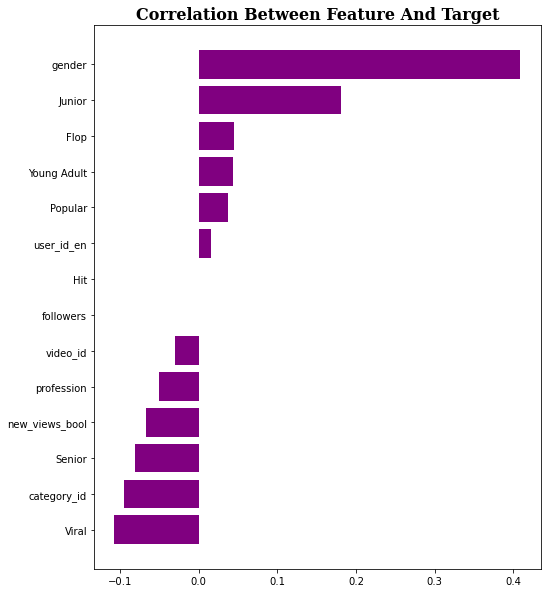

str

In [66]:
# creating a correlation dataframe with the corr values
corr_df = train.select_dtypes('number').drop('engagement_score', axis=1).corrwith(train['engagement_score']).sort_values().reset_index().rename(columns = {'index':'feature' ,0:'correlation'})

#Plotting
fig , ax = plt.subplots(figsize  = (8,10))
ax.barh(y =corr_df.feature , width = corr_df.correlation, color='purple' )
ax.set_title('correlation between feature and target'.title() ,
            fontsize = 16 , fontfamily = 'serif' , fontweight = 'bold')
plt.show()
type(corr_df.feature[0])

In [67]:
# List of features having minimal correlation
columns_with_low_correlation = corr_df[(corr_df.correlation >-0.02) & (corr_df.correlation<0.02)].feature.tolist()
columns_with_low_correlation

['followers', 'Hit', 'user_id_en']

In [68]:
# Dropping the features which are least correlated with our target variable
train.drop(['followers', 'Hit', 'user_id_en'], axis=1, inplace=True)
test.drop(['followers', 'Hit', 'user_id_en'], axis=1, inplace=True)

<code style="background:grey;color:black">Even though the video_id and category_id are highly correlated, dropping the video_id feature diminished the model performance marginally. So we remodelled keeping both the features.</code>

In [69]:
# Dropping one of the highly correlated features between category_id and video_id
# train.drop('video_id', axis=1, inplace=True)
# test.drop('video_id', axis=1, inplace=True)

<div class="alert alert-block alert-success">Checkpoint!</div>

  - [x] Loading and understanding the data
  - [x] EDA
  - [x] Feature Engineering
  - [x] Feature Selection
  - [ ] Base Model
  - [ ] Model Comparison
  - [ ] Conclusions
  - [ ]  Next Steps
  
We have completed a very important part of machine learning workflow, data cleaning. It is highly recommended to store the model-ready data before proceeding further.

Now, let's train and test our model.

## 5) <u>Modeling</u>

Let us start with splitting the train set into 2 parts which will be used in evaluating the model performance.
Starting with a simple linear regression as a base model. Then, compare the performance of random forest and Light GBM. We will also tune the hyperparameters to get the optimal model performance.

### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

X= train.drop('engagement_score',axis=1)
y= train['engagement_score']
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [72]:
def model_score(model, txt):
    '''
    Printing the performance metrics:
    R2 Square, Mean Absolute, Mean Squared Error, Root Mean Squared Error
    
    Parameters:
    model: Trained Model
    txt: To print the results for each model
    '''
    #Predicting the SalePrices using test set 
    y_pred = model.predict(x_test)            
    x_pred = model.predict(x_train)

    # Printing the metrics, comparing model's performance on seen and unseen data
    print('R2 square on train:',metrics.r2_score(y_train, x_pred))
    print('R2 square on test:',metrics.r2_score(y_test, y_pred))
    return x_pred, y_pred

In [73]:
def model_performance(y_pred, original_col, fitted_col, txt):
    '''
    This is to visualize the model performance.
    Parameters: 
    y_pred - Series of the predicted values
    original_col - Color of the actual value line
    fitted_col - color of the predicted value line
    '''
    plt.figure(figsize=(5,5))
    ax1 = sns.distplot(y_test, hist=False, color=original_col, label='Actual Value')
    sns.distplot(y_pred, hist=False, color=fitted_col, label='Predicted Value', ax=ax1)
    plt.title(txt, fontsize=20)

# Linear Regression

In [74]:
# create linear regression object
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
 
# regression coefficients
# print('Coefficients: ', lin_reg.coef_)

LinearRegression()

In [75]:
x_pred, y_pred = model_score(lin_reg, 'Linear Regression Scores: ')

R2 square on train: 0.24202502977427165
R2 square on test: 0.24277192364833933


## 6) <u>Model Comparison</u>

### Catboost

CatBoost is one of the most powerful algorithms which can even handle categorical data. Unlike many other algorithms where encoding is of utmost importance, Catboost works well even with dataset with categorical features. It is an ensemble technique which works on the principles of decision tree and gradient boosting. The main idea about boosting is to combine many weak models to finally create a strong model via greedy search.

In [76]:
# cb_reg = CatBoostRegressor()
# # parameters = {'depth' : [3,50,10],
# #               'learning_rate' : [0.01, 0.05, 0.1],
# #               'iterations'    : [30, 50, 100]
# #               }
# parameters = {'learning_rate': [0.01,0.02,0.03],
#                   'subsample'    : [0.9, 0.5, 0.2],
#                   'n_estimators' : [100,500,1000],
#                   'max_depth'    : [4,6,8]
#                  }

# grid = GridSearchCV(estimator=cb_reg, param_grid = parameters, cv = 4, n_jobs=-1)
# grid.fit(x_train, y_train)

In [146]:
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.9}

In [104]:
cbr = CatBoostRegressor(learning_rate=0.03, max_depth=6, n_estimators=1000, subsample=0.9)
cbr.fit(x_train, y_train)

0:	learn: 0.8544565	total: 24.8ms	remaining: 24.8s
1:	learn: 0.8474215	total: 37.1ms	remaining: 18.5s
2:	learn: 0.8407409	total: 48.9ms	remaining: 16.3s
3:	learn: 0.8345209	total: 60.8ms	remaining: 15.1s
4:	learn: 0.8284206	total: 74.2ms	remaining: 14.8s
5:	learn: 0.8227467	total: 87.2ms	remaining: 14.4s
6:	learn: 0.8179477	total: 96.4ms	remaining: 13.7s
7:	learn: 0.8127816	total: 108ms	remaining: 13.4s
8:	learn: 0.8078547	total: 120ms	remaining: 13.2s
9:	learn: 0.8033170	total: 133ms	remaining: 13.2s
10:	learn: 0.7988346	total: 145ms	remaining: 13s
11:	learn: 0.7950408	total: 158ms	remaining: 13s
12:	learn: 0.7910375	total: 170ms	remaining: 12.9s
13:	learn: 0.7871790	total: 179ms	remaining: 12.6s
14:	learn: 0.7836629	total: 193ms	remaining: 12.7s
15:	learn: 0.7802522	total: 203ms	remaining: 12.5s
16:	learn: 0.7770254	total: 216ms	remaining: 12.5s
17:	learn: 0.7739968	total: 228ms	remaining: 12.5s
18:	learn: 0.7711891	total: 240ms	remaining: 12.4s
19:	learn: 0.7684105	total: 250ms	rema

172:	learn: 0.7035616	total: 1.78s	remaining: 8.49s
173:	learn: 0.7034957	total: 1.79s	remaining: 8.48s
174:	learn: 0.7033092	total: 1.8s	remaining: 8.49s
175:	learn: 0.7032587	total: 1.81s	remaining: 8.47s
176:	learn: 0.7032235	total: 1.82s	remaining: 8.46s
177:	learn: 0.7031323	total: 1.83s	remaining: 8.44s
178:	learn: 0.7030420	total: 1.84s	remaining: 8.43s
179:	learn: 0.7029330	total: 1.85s	remaining: 8.41s
180:	learn: 0.7028030	total: 1.85s	remaining: 8.4s
181:	learn: 0.7027222	total: 1.86s	remaining: 8.38s
182:	learn: 0.7026760	total: 1.87s	remaining: 8.36s
183:	learn: 0.7026379	total: 1.88s	remaining: 8.34s
184:	learn: 0.7025665	total: 1.89s	remaining: 8.33s
185:	learn: 0.7024511	total: 1.9s	remaining: 8.31s
186:	learn: 0.7024161	total: 1.91s	remaining: 8.3s
187:	learn: 0.7023679	total: 1.92s	remaining: 8.28s
188:	learn: 0.7023128	total: 1.93s	remaining: 8.26s
189:	learn: 0.7022493	total: 1.93s	remaining: 8.25s
190:	learn: 0.7021843	total: 1.94s	remaining: 8.23s
191:	learn: 0.70

335:	learn: 0.6951723	total: 3.31s	remaining: 6.55s
336:	learn: 0.6951504	total: 3.33s	remaining: 6.55s
337:	learn: 0.6951358	total: 3.34s	remaining: 6.54s
338:	learn: 0.6950789	total: 3.35s	remaining: 6.54s
339:	learn: 0.6950211	total: 3.36s	remaining: 6.53s
340:	learn: 0.6949849	total: 3.38s	remaining: 6.52s
341:	learn: 0.6949383	total: 3.39s	remaining: 6.51s
342:	learn: 0.6949130	total: 3.4s	remaining: 6.51s
343:	learn: 0.6948725	total: 3.41s	remaining: 6.5s
344:	learn: 0.6947831	total: 3.42s	remaining: 6.49s
345:	learn: 0.6947502	total: 3.43s	remaining: 6.48s
346:	learn: 0.6946990	total: 3.44s	remaining: 6.47s
347:	learn: 0.6946734	total: 3.45s	remaining: 6.46s
348:	learn: 0.6946553	total: 3.46s	remaining: 6.45s
349:	learn: 0.6946375	total: 3.47s	remaining: 6.44s
350:	learn: 0.6945545	total: 3.48s	remaining: 6.43s
351:	learn: 0.6945022	total: 3.49s	remaining: 6.42s
352:	learn: 0.6944459	total: 3.5s	remaining: 6.41s
353:	learn: 0.6944104	total: 3.51s	remaining: 6.4s
354:	learn: 0.69

495:	learn: 0.6904664	total: 4.86s	remaining: 4.94s
496:	learn: 0.6904540	total: 4.87s	remaining: 4.93s
497:	learn: 0.6904215	total: 4.88s	remaining: 4.92s
498:	learn: 0.6903909	total: 4.89s	remaining: 4.92s
499:	learn: 0.6903751	total: 4.9s	remaining: 4.9s
500:	learn: 0.6903665	total: 4.91s	remaining: 4.89s
501:	learn: 0.6903496	total: 4.92s	remaining: 4.88s
502:	learn: 0.6903339	total: 4.93s	remaining: 4.87s
503:	learn: 0.6903099	total: 4.94s	remaining: 4.86s
504:	learn: 0.6903017	total: 4.95s	remaining: 4.85s
505:	learn: 0.6902773	total: 4.96s	remaining: 4.84s
506:	learn: 0.6902616	total: 4.97s	remaining: 4.83s
507:	learn: 0.6902470	total: 4.98s	remaining: 4.82s
508:	learn: 0.6902295	total: 4.99s	remaining: 4.81s
509:	learn: 0.6902208	total: 4.99s	remaining: 4.8s
510:	learn: 0.6902091	total: 5s	remaining: 4.79s
511:	learn: 0.6902001	total: 5.01s	remaining: 4.78s
512:	learn: 0.6901882	total: 5.02s	remaining: 4.77s
513:	learn: 0.6901737	total: 5.03s	remaining: 4.76s
514:	learn: 0.6901

655:	learn: 0.6880884	total: 6.63s	remaining: 3.48s
656:	learn: 0.6880782	total: 6.64s	remaining: 3.47s
657:	learn: 0.6880633	total: 6.65s	remaining: 3.46s
658:	learn: 0.6880572	total: 6.66s	remaining: 3.45s
659:	learn: 0.6880398	total: 6.67s	remaining: 3.44s
660:	learn: 0.6880243	total: 6.68s	remaining: 3.43s
661:	learn: 0.6880142	total: 6.69s	remaining: 3.42s
662:	learn: 0.6880078	total: 6.7s	remaining: 3.4s
663:	learn: 0.6879982	total: 6.71s	remaining: 3.39s
664:	learn: 0.6879910	total: 6.72s	remaining: 3.38s
665:	learn: 0.6879839	total: 6.73s	remaining: 3.37s
666:	learn: 0.6879721	total: 6.74s	remaining: 3.36s
667:	learn: 0.6879581	total: 6.75s	remaining: 3.36s
668:	learn: 0.6879444	total: 6.77s	remaining: 3.35s
669:	learn: 0.6879382	total: 6.78s	remaining: 3.34s
670:	learn: 0.6879316	total: 6.79s	remaining: 3.33s
671:	learn: 0.6879197	total: 6.8s	remaining: 3.32s
672:	learn: 0.6879044	total: 6.81s	remaining: 3.31s
673:	learn: 0.6878898	total: 6.83s	remaining: 3.3s
674:	learn: 0.68

816:	learn: 0.6865167	total: 8.38s	remaining: 1.88s
817:	learn: 0.6865103	total: 8.39s	remaining: 1.87s
818:	learn: 0.6864979	total: 8.41s	remaining: 1.86s
819:	learn: 0.6864866	total: 8.42s	remaining: 1.85s
820:	learn: 0.6864820	total: 8.43s	remaining: 1.84s
821:	learn: 0.6864737	total: 8.44s	remaining: 1.83s
822:	learn: 0.6864673	total: 8.46s	remaining: 1.82s
823:	learn: 0.6864604	total: 8.46s	remaining: 1.81s
824:	learn: 0.6864530	total: 8.48s	remaining: 1.8s
825:	learn: 0.6864437	total: 8.49s	remaining: 1.79s
826:	learn: 0.6864397	total: 8.5s	remaining: 1.78s
827:	learn: 0.6864321	total: 8.51s	remaining: 1.77s
828:	learn: 0.6864252	total: 8.52s	remaining: 1.76s
829:	learn: 0.6864142	total: 8.53s	remaining: 1.75s
830:	learn: 0.6864108	total: 8.54s	remaining: 1.74s
831:	learn: 0.6864082	total: 8.55s	remaining: 1.73s
832:	learn: 0.6864031	total: 8.56s	remaining: 1.72s
833:	learn: 0.6863943	total: 8.58s	remaining: 1.71s
834:	learn: 0.6863916	total: 8.59s	remaining: 1.7s
835:	learn: 0.6

989:	learn: 0.6853109	total: 10.1s	remaining: 102ms
990:	learn: 0.6852990	total: 10.1s	remaining: 91.8ms
991:	learn: 0.6852917	total: 10.1s	remaining: 81.6ms
992:	learn: 0.6852848	total: 10.1s	remaining: 71.4ms
993:	learn: 0.6852794	total: 10.1s	remaining: 61.2ms
994:	learn: 0.6852756	total: 10.2s	remaining: 51ms
995:	learn: 0.6852704	total: 10.2s	remaining: 40.8ms
996:	learn: 0.6852615	total: 10.2s	remaining: 30.6ms
997:	learn: 0.6852587	total: 10.2s	remaining: 20.4ms
998:	learn: 0.6852563	total: 10.2s	remaining: 10.2ms
999:	learn: 0.6852506	total: 10.2s	remaining: 0us


In [105]:
cbr_x_reg, cbr_y_reg = model_score(cbr, 'CatBoost Regression Scores: ')

R2 square on train: 0.3678312522300765
R2 square on test: 0.363240441767954


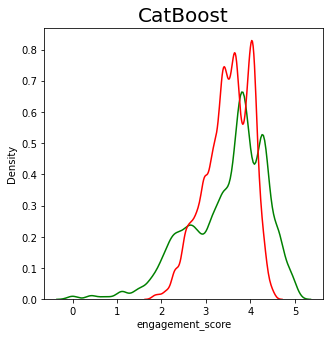

In [109]:
model_performance(cbr_y_reg, 'g', 'r', 'CatBoost')

### Random Forest

Random Forest is another ensemble technique that works on bagging concept. It is an extension of decision tree algorithm. Variance of single decision tree is high, random forest combines many decision tree which lowers the variance and improves the model performance drastically.

In [97]:
# Setting the parameters

n_estimators = [150,100,50]                                           # number of trees in the random forest
max_features = ['auto', 'sqrt']                                       # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 30, num = 8)]            # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 8]                                         # minimum sample number to split a node
min_samples_leaf = [3, 4, 6]                                          # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]                                             # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

In [101]:
# from sklearn.model_selection import RandomizedSearchCV

# rf=RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1, scoring = 'r2')
# rf_random.fit(x_train, y_train)

In [99]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 12}

In [102]:
rf = RandomForestRegressor(random_state=0, **rf_random.best_params_)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=50, random_state=0)

In [103]:
# y_pred = rf.predict(x_test)
rf_x_reg, rf_y_reg = model_score(rf, 'Random Forest Score: ')

R2 square on train: 0.3757058638364873
R2 square on test: 0.3559850402282164


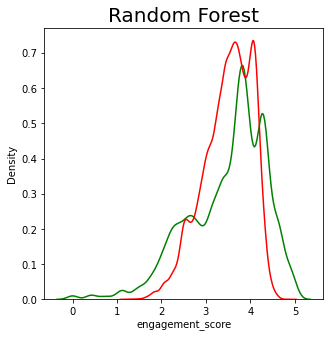

In [95]:
model_performance(rf_y_reg, 'g', 'r', 'Random Forest')

### Final Model

The Linear Regression performed poorly with a R-square score of just 0.24.

We can say that the random forest model is slightly <mark>overfitted</mark> as its score is higher on the train set (0.39) and it did not do that well on train set(0.34) whereas Catboost scored similar on seen and unseen data. Therefore, we will consider Catboost as our score predicting model.

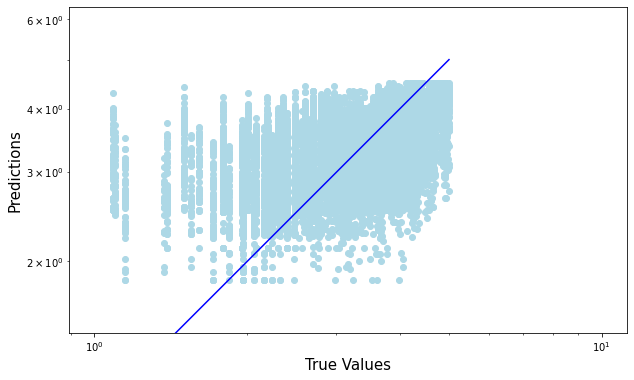

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, cbr_y_reg, c='lightblue')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(cbr_y_reg), max(y_test))
p2 = min(min(cbr_y_reg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Preparing the Submission File

In [106]:
submission = cbr.predict(test)              # Predict with the best model
submission                                   # This contains our predicted values

array([4.11053276, 3.6431006 , 2.75058064, ..., 3.90553262, 3.8050001 ,
       3.40244968])

In [107]:
# Formatting to create a submission csv file with just the id and target

submit = pd.DataFrame()
submit['row_id'] = row_id
submit['engagement_score'] = submission
submit

,row_id,engagement_score
0,89198,4.110533
1,89199,3.643101
2,89200,2.750581
3,89201,3.776435
4,89202,2.522755
...,...,...
11116,100314,3.958368
11117,100315,3.427947
11118,100316,3.905533
11119,100317,3.805000


In [108]:
submit.to_csv('Final Submission.csv', index=False)

## 7) <u>Conclusions</u>

The dataset was not very messy; the best part was that there were no missing data. Some important features which would have been useful:
   - Date and Time of video upload
   - Likes and Dislikes on the video
   - Comments and Ratings enabled or disabled
   - Number of Shares
   - Duration of the video
   - Genre
   
Experiments performed and their outcomes:
   - Scaling did not help in improving the model performance. As we see that the feature values did not vary much and all the columns had values within a small range hence, scaling was not effective in our case
   - Linear Regression performed poorly. Even without hyperparameter tuning Random Forest and Light GBM did much better than Linear Regression
   - Dropping the irrelevant features during feature selection step did improve random forest model’s performance
   - Removing the video_id column which is highly correlated with category_id improved the model’s performance negligibly.

## 8) <u>Next Steps</u>

   - We can try extracting other features and see whether they help in predicting the score
    
   - We can experiment further with the values of the hyperparameters and see if we see any major difference
    
   - R-square is not a recommended performance metrics as it increases with increase in number of features giving us a false picture of our model. It is not always true that higher R-square value means a better model. A very good alternative would be adjuster R-square. Perhaps we can use this metric to judge our models.